In [1]:
# input data files are available in the read-only
#running this will list all the files under the input directory

import numpy as np
import pandas as pd
pd.options.display.float_format = '{:20,.2f}'.format

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./input\all_match_results.csv
./input\all_players_stats.csv
./input\points_table.csv


# Points table Data

In [2]:
pt = pd.read_csv("C:\\Users\\Siddhesh E. Paradkar\\Downloads\\Football analysis\\input\\points_table.csv")
pt.head(100)

Pos                      Team  Pld   W   D   L  GF  GA  GD  Pts
0     1           Manchester City   38  29   6   3  99  26  73   93
1     2                 Liverpool   38  28   8   2  94  26  68   92
2     3                   Chelsea   38  21  11   6  76  33  43   74
3     4         Tottenham Hotspur   38  22   5  11  69  40  29   71
4     5                   Arsenal   38  22   3  13  61  48  13   69
5     6         Manchester United   38  16  10  12  57  57   0   58
6     7           West Ham United   38  16   8  14  60  51   9   56
7     8            Leicester City   38  14  10  14  62  59   3   52
8     9  Brighton and Hove Albion   38  12  15  11  42  44  -2   51
9    10   Wolverhampton Wanderers   38  15   6  17  38  43  -5   51
10   11          Newcastle United   38  13  10  15  44  62 -18   49
11   12            Crystal Palace   38  11  15  12  50  46   4   48
12   13                 Brentford   38  13   7  18  48  56  -8   46
13   14               Aston Villa   38  13   6  19  52  54  -2   45
14   15               Southampton   38   9  13  16  43  67 -24   40
15   16                   Everton   38  11   6  21  43  66 -23   39
16   17              Leeds United   38   9  11  18  42  79 -37   38
17   18                   Burnley   38   7  14  17  34  53 -19   35
18   19                   Watford   38   6   5  27  34  77 -43   23
19   20              Norwich City   38   5   7  26  23  84 -61   22

# Data check

In [3]:
pt.shape

(20, 10)

In [4]:
pt.isnull().sum()

Pos     0
Team    0
Pld     0
W       0
D       0
L       0
GF      0
GA      0
GD      0
Pts     0
dtype: int64

In [5]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pos     20 non-null     int64 
 1   Team    20 non-null     object
 2   Pld     20 non-null     int64 
 3   W       20 non-null     int64 
 4   D       20 non-null     int64 
 5   L       20 non-null     int64 
 6   GF      20 non-null     int64 
 7   GA      20 non-null     int64 
 8   GD      20 non-null     int64 
 9   Pts     20 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.7+ KB


# Creating Averages

In [6]:
pt['GF_Avg']=(pt['GF']/pt['Pld'])
pt['GA_Avg']=(pt['GA']/pt['Pld'])

pt.head()

Pos               Team  Pld   W   D   L  GF  GA  GD  Pts  \
0    1    Manchester City   38  29   6   3  99  26  73   93   
1    2          Liverpool   38  28   8   2  94  26  68   92   
2    3            Chelsea   38  21  11   6  76  33  43   74   
3    4  Tottenham Hotspur   38  22   5  11  69  40  29   71   
4    5            Arsenal   38  22   3  13  61  48  13   69   

                GF_Avg               GA_Avg  
0                 2.61                 0.68  
1                 2.47                 0.68  
2                 2.00                 0.87  
3                 1.82                 1.05  
4                 1.61                 1.26

In [7]:
pt.columns

Index(['Pos', 'Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'GF_Avg',
       'GA_Avg'],
      dtype='object')

In [8]:
pt.describe()

Pos                  Pld                    W  \
count                20.00                20.00                20.00   
mean                 10.50                38.00                14.60   
std                   5.92                 0.00                 6.76   
min                   1.00                38.00                 5.00   
25%                   5.75                38.00                10.50   
50%                  10.50                38.00                13.00   
75%                  15.25                38.00                17.25   
max                  20.00                38.00                29.00   

                         D                    L                   GF  \
count                20.00                20.00                20.00   
mean                  8.80                14.60                53.55   
std                   3.53                 6.45                19.45   
min                   3.00                 2.00                23.00   
25%                   6.00                11.75                42.00   
50%                   8.00                14.50                49.00   
75%                  11.00                18.00                61.25   
max                  15.00                27.00                99.00   

                        GA                   GD                  Pts  \
count                20.00                20.00                20.00   
mean                 53.55                 0.00                52.60   
std                  16.22                33.83                19.35   
min                  26.00               -61.00                22.00   
25%                  43.75               -20.00                39.75   
50%                  53.50                -2.00                50.00   
75%                  63.00                10.00                60.75   
max                  84.00                73.00                93.00   

                    GF_Avg               GA_Avg  
count                20.00                20.00  
mean                  1.41                 1.41  
std                   0.51                 0.43  
min                   0.61                 0.68  
25%                   1.11                 1.15  
50%                   1.29                 1.41  
75%                   1.61                 1.66  
max                   2.61                 2.21

#### Max Points = 114 (if a team wins all matches)
#### Mean Points = 52.6
#### Mean Goals For and Against = 53.55

# Exploratory Data Analysis

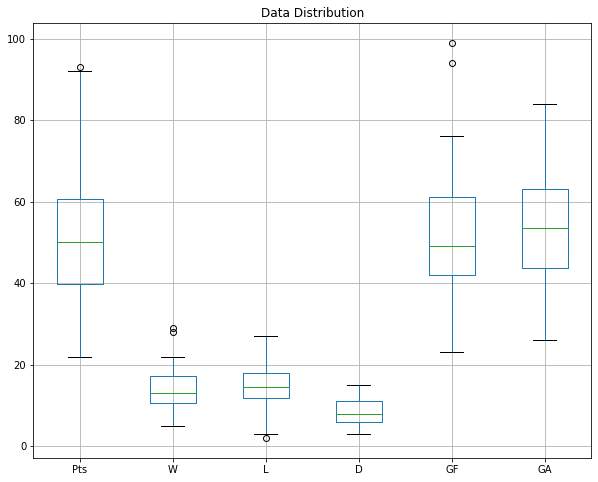

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

box_pt = pt.boxplot(column=['Pts','W','L','D','GF','GA'])
plt.title('Data Distribution')
box_pt.plot()

plt.show()

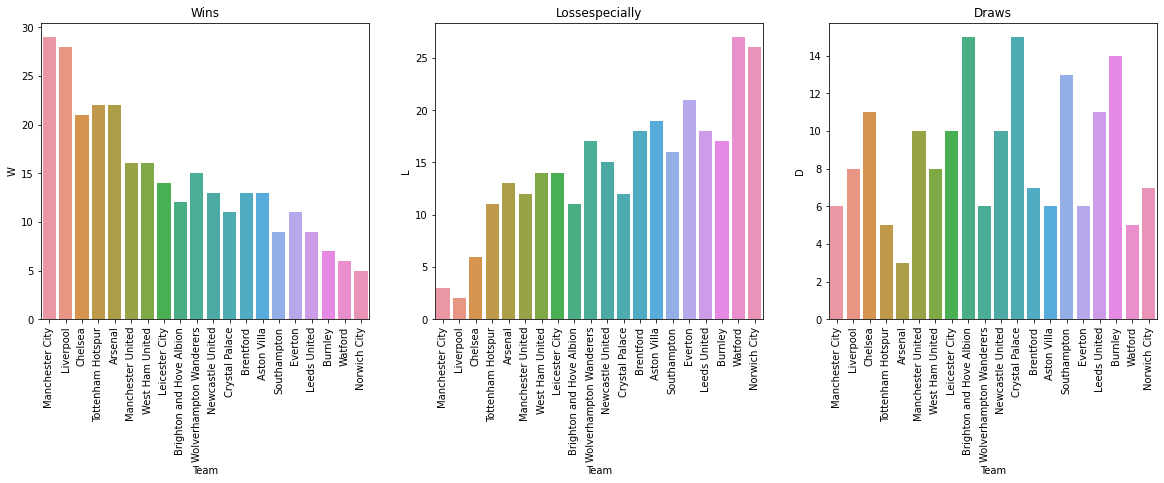

In [10]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.barplot(x='Team', y='W', data=pt).set_title('Wins')
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.barplot(x='Team', y='L', data=pt).set_title('Lossespecially')
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.barplot(x='Team', y='D', data=pt).set_title('Draws')
plt.xticks(rotation=90)

plt.show()

#### Among the top 6 teams
##### Manchester City
##### Liverpool
##### Chelsea
##### Tottenham Hotspur
##### Arsenal
##### Manchester United

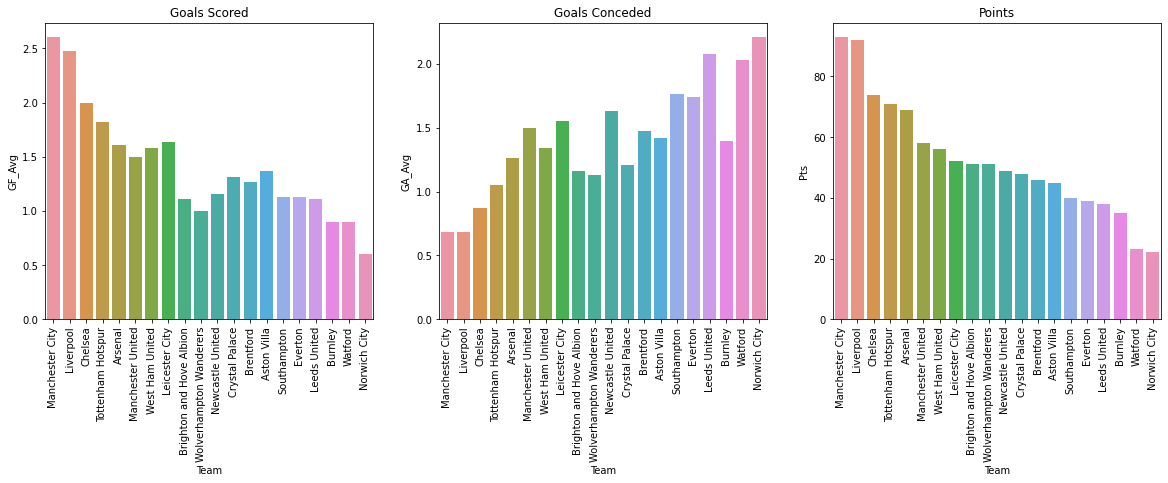

In [11]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.barplot(x='Team', y='GF_Avg', data=pt).set_title('Goals Scored')
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.barplot(x='Team', y='GA_Avg', data=pt).set_title('Goals Conceded')
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.barplot(x='Team', y='Pts', data=pt).set_title('Points')
plt.xticks(rotation=90)

plt.show()

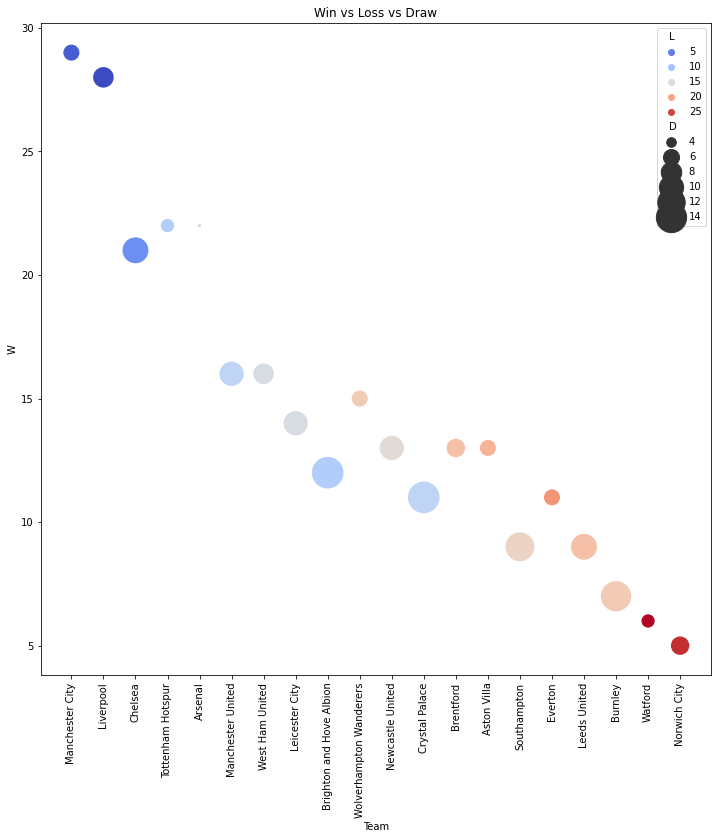

In [12]:
plt.subplots(figsize=(12,12))
sns.scatterplot(x='Team', y='W',
               hue='L', size='D',
               palette='coolwarm',
               sizes=(10,1000),linewidth=0,
               data=pt).set_title('Win vs Loss vs Draw')
plt.xticks(rotation=90)
plt.show()

#### Losses are defined by color or bubble
#### Draws are defined by size of bubble
#### for example: Smallest blue bubble indicates team with less losses and less Draws; largest Red Bubble Indicates the team with most losses and most Draws

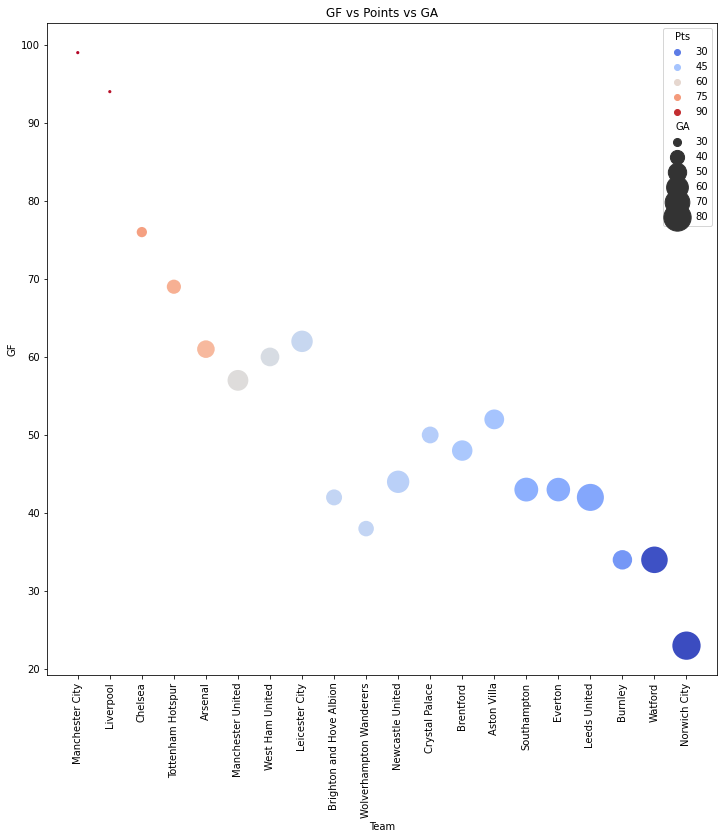

In [13]:
plt.subplots(figsize=(12,12))
sns.scatterplot(x='Team', y='GF',
               hue='Pts', size='GA',
               palette='coolwarm',
               sizes=(10,800),linewidth=0,
               data=pt).set_title('GF vs Points vs GA')
plt.xticks(rotation=90)
plt.show()

In [14]:
pt.columns

Index(['Pos', 'Team', 'Pld', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'GF_Avg',
       'GA_Avg'],
      dtype='object')

In [15]:
ptg = pt.drop(['Pos','Team','Pld','W','L','D',"GF_Avg",'GA_Avg'],axis=1)
ptg.head()

GF  GA  GD  Pts
0  99  26  73   93
1  94  26  68   92
2  76  33  43   74
3  69  40  29   71
4  61  48  13   69

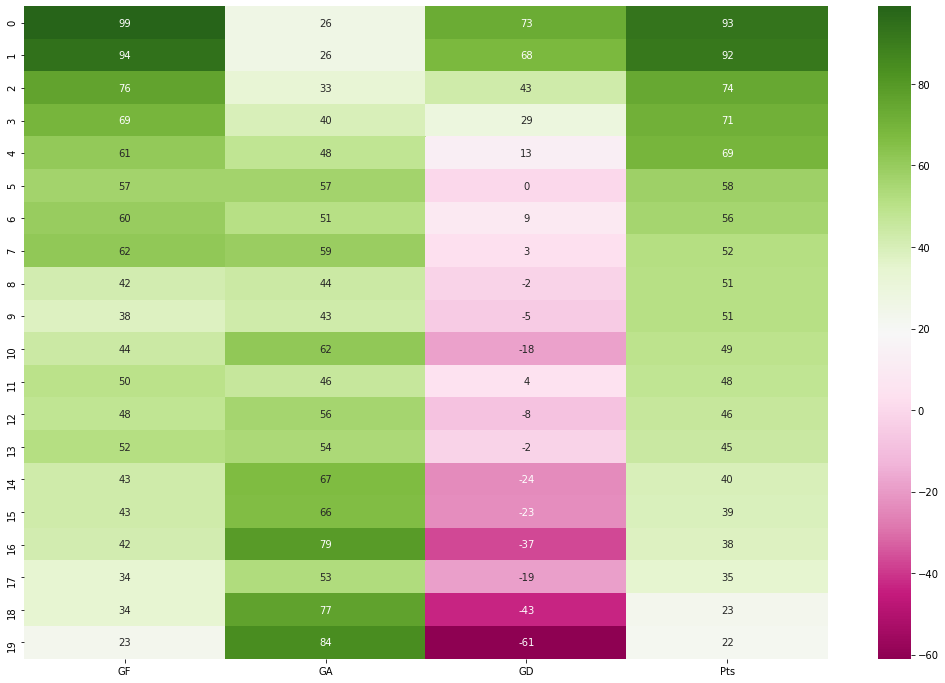

In [16]:
cor=ptg.corr
plt.figure(figsize=(18,12))

sns.heatmap(ptg, annot=True, cmap='PiYG')

plt.show()

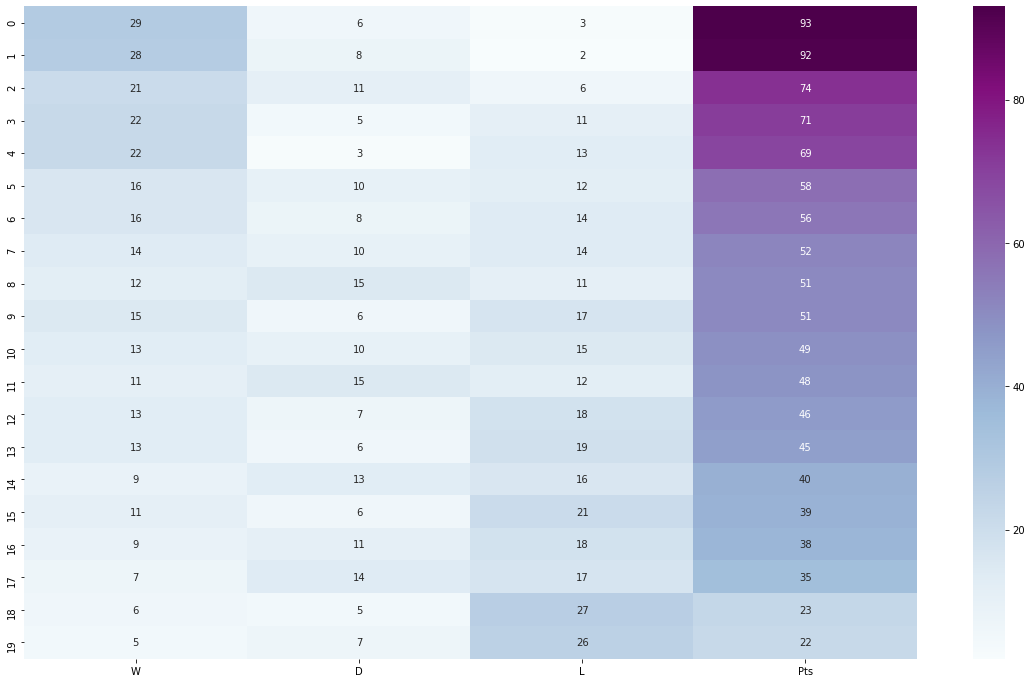

In [17]:
ptp = pt.drop(['Pos', 'Team', 'Pld', "GF",'GA','GD', 'GF_Avg', 'GA_Avg'], axis=1)
cor=ptp.corr
plt.figure(figsize=(20,12))

sns.heatmap(ptp, annot=True, cmap='BuPu')

plt.show()

# Player Stats Data

In [18]:
ps = pd.read_csv("C:\\Users\\Siddhesh E. Paradkar\\Downloads\\Football analysis\\input\\all_players_stats.csv")
ps.head(100)

Team  JerseyNo           Player             Position  \
0                    Arsenal         7      Bukayo Saka  Defender/Midfielder   
1                    Arsenal         6          Gabriel             Defender   
2                    Arsenal        32   Aaron Ramsdale           Goalkeeper   
3                    Arsenal         4        Ben White             Defender   
4                    Arsenal         8  Martin Odegaard           Midfielder   
..                       ...       ...              ...                  ...   
95  Brighton and Hove Albion        17    Steven Alzate  Defender/Midfielder   
96  Brighton and Hove Albion         8    Yves Bissouma           Midfielder   
97  Brighton and Hove Albion        33         Dan Burn             Defender   
98  Brighton and Hove Albion        25   Moisés Caicedo           Midfielder   
99  Brighton and Hove Albion         7   Aaron Connolly              Forward   

    Apearances  Substitutions  Goals  Penalties          YellowCards  \
0           40              3     12          2                 6.00   
1           37              1      5          0                 7.00   
2           37              0      0          0                 1.00   
3           37              0      0          0                 3.00   
4           36              4      7          0                 4.00   
..         ...            ...    ...        ...                  ...   
95           8              4      0          0                 0.00   
96          26              2      2          0                10.00   
97          15              1      1          0                 4.00   
98           9              1      1          0                 2.00   
99           3              3      2          0                 0.00   

               RedCards  
0                  0.00  
1                  1.00  
2                  0.00  
3                  0.00  
4                  0.00  
..                  ...  
95                 0.00  
96                 0.00  
97                 0.00  
98                 0.00  
99                 0.00  

[100 rows x 10 columns]

In [19]:
ps.shape

(623, 10)

In [20]:
# To determine who scores more goals even though they play less
# To determine who fouls more even though they appear less

ps['G/A']=ps['Goals']/ps['Apearances']
ps['Y/A']=ps['YellowCards']/ps['Apearances']
ps['S/A']=ps['Substitutions']/ps['Apearances']

In [21]:
ps.head()

Team  JerseyNo           Player             Position  Apearances  \
0  Arsenal         7      Bukayo Saka  Defender/Midfielder          40   
1  Arsenal         6          Gabriel             Defender          37   
2  Arsenal        32   Aaron Ramsdale           Goalkeeper          37   
3  Arsenal         4        Ben White             Defender          37   
4  Arsenal         8  Martin Odegaard           Midfielder          36   

   Substitutions  Goals  Penalties          YellowCards             RedCards  \
0              3     12          2                 6.00                 0.00   
1              1      5          0                 7.00                 1.00   
2              0      0          0                 1.00                 0.00   
3              0      0          0                 3.00                 0.00   
4              4      7          0                 4.00                 0.00   

                   G/A                  Y/A                  S/A  
0                 0.30                 0.15                 0.07  
1                 0.14                 0.19                 0.03  
2                 0.00                 0.03                 0.00  
3                 0.00                 0.08                 0.00  
4                 0.19                 0.11                 0.11

In [22]:
ps.describe()

JerseyNo           Apearances        Substitutions  \
count               623.00               623.00               623.00   
mean                 22.60                16.86                 4.63   
std                  18.72                13.95                 4.95   
min                   1.00                 0.00                 0.00   
25%                   9.00                 3.00                 1.00   
50%                  18.00                16.00                 3.00   
75%                  30.00                27.50                 7.00   
max                  97.00                54.00                25.00   

                     Goals            Penalties          YellowCards  \
count               623.00               623.00               623.00   
mean                  2.25                 0.17                 2.46   
std                   4.07                 0.79                 2.69   
min                   0.00                 0.00                 0.00   
25%                   0.00                 0.00                 0.00   
50%                   1.00                 0.00                 2.00   
75%                   3.00                 0.00                 4.00   
max                  31.00                 9.00                12.00   

                  RedCards                  G/A                  Y/A  \
count               623.00               569.00               572.00   
mean                  0.09                 0.13                  inf   
std                   0.30                 0.21                  nan   
min                   0.00                 0.00                 0.00   
25%                   0.00                 0.00                 0.00   
50%                   0.00                 0.05                 0.11   
75%                   0.00                 0.17                 0.22   
max                   2.00                 2.00                  inf   

                       S/A  
count               623.00  
mean                   inf  
std                    nan  
min                   0.00  
25%                   0.06  
50%                   0.29  
75%                   1.00  
max                    inf

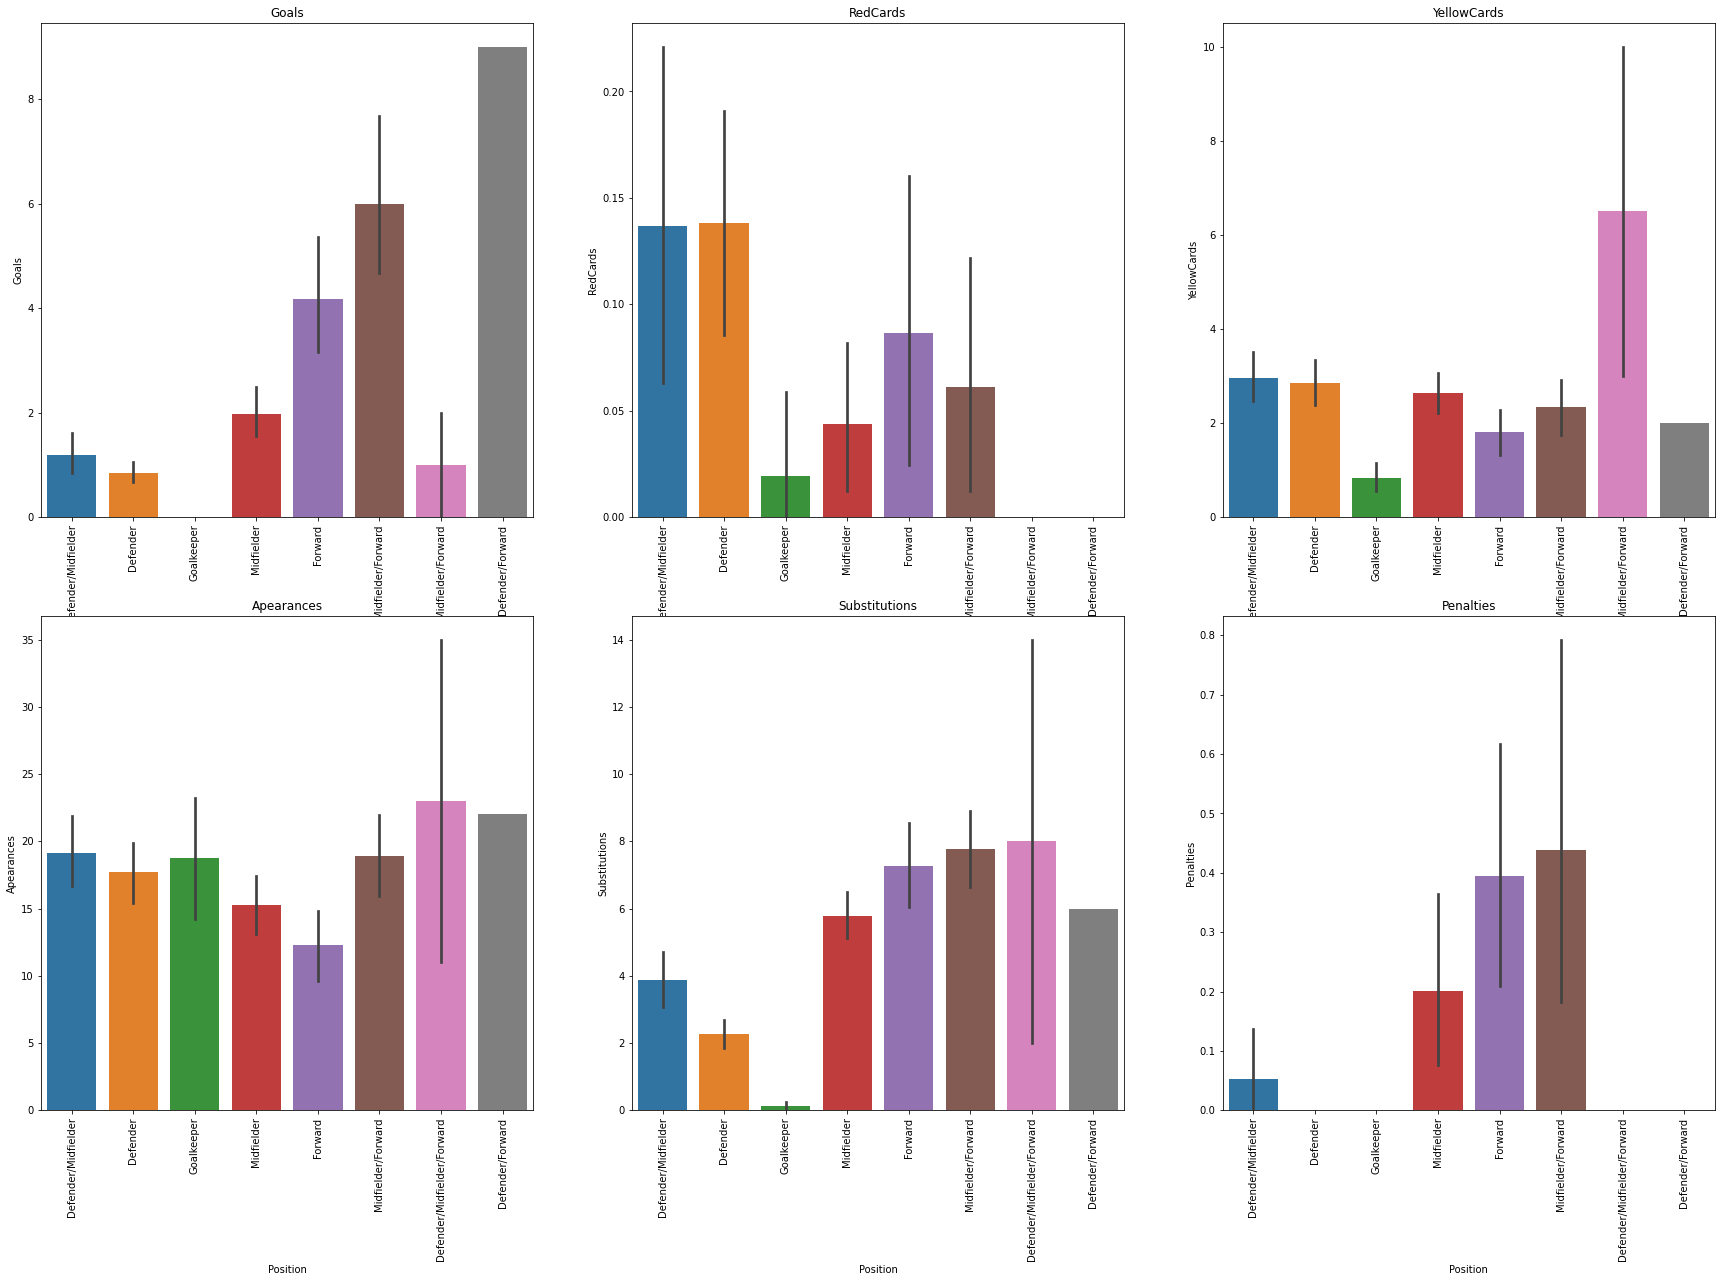

In [23]:
plt.figure(figsize=(30,20))
plt.subplot(2,3,1)
sns.barplot(x='Position', y='Goals', data=ps).set_title('Goals')
plt.xticks(rotation=90)
plt.subplot(2,3,2)
sns.barplot(x='Position', y='RedCards', data=ps).set_title('RedCards')
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.barplot(x='Position', y='YellowCards', data=ps).set_title('YellowCards')
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.barplot(x='Position', y='Apearances', data=ps).set_title('Apearances')
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.barplot(x='Position', y='Substitutions', data=ps).set_title('Substitutions')
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.barplot(x='Position', y='Penalties', data=ps).set_title('Penalties')
plt.xticks(rotation=90)

plt.show()

## Players with Maximum Goals

In [24]:
ps.loc[ps['Goals'].idxmax()]

Team                       Liverpool
JerseyNo                          11
Player                 Mohamed Salah
Position          Midfielder/Forward
Apearances                        44
Substitutions                      6
Goals                             31
Penalties                          6
YellowCards                     1.00
RedCards                        0.00
G/A                             0.70
Y/A                             0.02
S/A                             0.14
Name: 341, dtype: object

In [25]:
ps['S/A']=(ps['G/A']>=10)
ps.loc[ps['G/A'].idxmax()]

Team                     Aston Villa
JerseyNo                          35
Player                Cameron Archer
Position                     Forward
Apearances                         2
Substitutions                      3
Goals                              4
Penalties                          0
YellowCards                     0.00
RedCards                        0.00
G/A                             2.00
Y/A                             0.00
S/A                            False
Name: 28, dtype: object

In [26]:
ps.loc[ps['RedCards'].idxmax()]

Team                         Arsenal
JerseyNo                          34
Player                  Granit Xhaka
Position         Defender/Midfielder
Apearances                        29
Substitutions                      1
Goals                              1
Penalties                          0
YellowCards                    10.00
RedCards                        2.00
G/A                             0.03
Y/A                             0.34
S/A                            False
Name: 5, dtype: object

In [27]:
ps.loc[ps['YellowCards'].idxmax()]

Team                         Burnley
JerseyNo                           5
Player               James Tarkowski
Position                    Defender
Apearances                        37
Substitutions                      0
Goals                              1
Penalties                          0
YellowCards                    12.00
RedCards                        0.00
G/A                             0.03
Y/A                             0.32
S/A                            False
Name: 149, dtype: object

In [28]:
ps.loc[ps['Apearances'].idxmax()]

Team                         Chelsea
JerseyNo                           2
Player               Antonio Rüdiger
Position                    Defender
Apearances                        54
Substitutions                      0
Goals                              5
Penalties                          0
YellowCards                    12.00
RedCards                        0.00
G/A                             0.09
Y/A                             0.22
S/A                            False
Name: 178, dtype: object

In [29]:
ps.loc[ps['Penalties'].idxmax()]

Team                         Chelsea
JerseyNo                           5
Player                      Jorginho
Position                  Midfielder
Apearances                        40
Substitutions                      7
Goals                              9
Penalties                          9
YellowCards                     6.00
RedCards                        0.00
G/A                             0.23
Y/A                             0.15
S/A                            False
Name: 167, dtype: object

In [30]:
ps.loc[ps['Substitutions'].idxmax()]

Team                       Liverpool
JerseyNo                           7
Player                  James Milner
Position         Defender/Midfielder
Apearances                        14
Substitutions                     25
Goals                              0
Penalties                          0
YellowCards                     5.00
RedCards                        0.00
G/A                             0.00
Y/A                             0.36
S/A                            False
Name: 333, dtype: object

In [31]:
ps.columns

Index(['Team', 'JerseyNo', 'Player', 'Position', 'Apearances', 'Substitutions',
       'Goals', 'Penalties', 'YellowCards', 'RedCards', 'G/A', 'Y/A', 'S/A'],
      dtype='object')

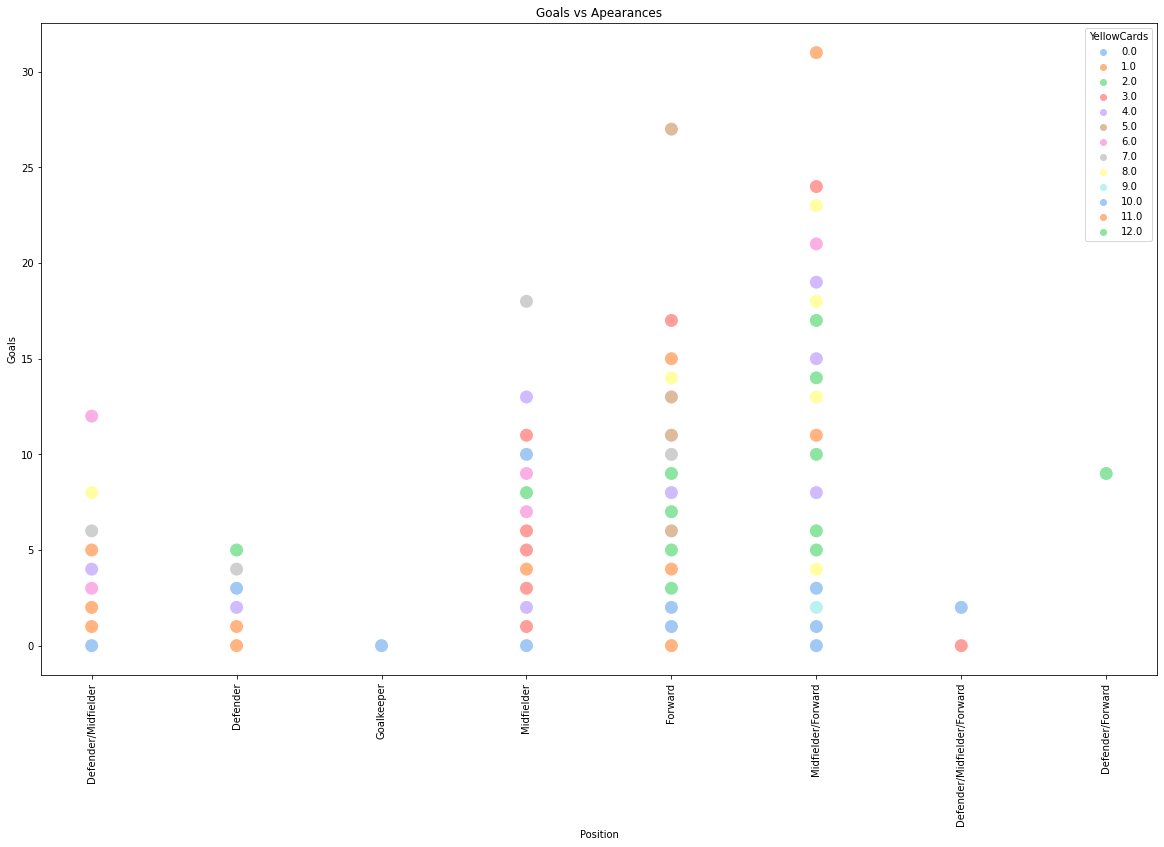

In [32]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='Position', y='Goals', hue='YellowCards',s=200,palette='pastel',data=ps).set_title('Goals vs Apearances')
plt.xticks(rotation=90)

plt.show()

In [33]:
import plotly.express as px
fig=px.sunburst(ps, path=['Position','Team'], values='Goals', color='Position')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

In [34]:
fig=px.sunburst(ps, path=['Team','Position'], values='Goals')
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

# Match Results

In [35]:
mr = pd.read_csv("C:\\Users\\Siddhesh E. Paradkar\\Downloads\\Football analysis\\input\\all_match_results.csv")
mr.head(100)

Date                 HomeTeam Result                  AwayTeam
0   13-Aug-2021                Brentford    2:0                   Arsenal
1   14-Aug-2021                  Burnley    1:2  Brighton and Hove Albion
2   14-Aug-2021                  Chelsea    3:0            Crystal Palace
3   14-Aug-2021                  Everton    3:1               Southampton
4   14-Aug-2021           Leicester City    1:0   Wolverhampton Wanderers
..          ...                      ...    ...                       ...
95  30-Oct-2021        Tottenham Hotspur    0:3         Manchester United
96  30-Oct-2021                  Watford    0:1               Southampton
97  31-Oct-2021              Aston Villa    1:4           West Ham United
98  31-Oct-2021             Norwich City    1:2              Leeds United
99  01-Nov-2021  Wolverhampton Wanderers    2:1                   Everton

[100 rows x 4 columns]

In [36]:
mr.shape

(380, 4)

In [37]:
mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      380 non-null    object
 1   HomeTeam  380 non-null    object
 2   Result    380 non-null    object
 3   AwayTeam  380 non-null    object
dtypes: object(4)
memory usage: 12.0+ KB


In [38]:
mr[['Won','Lost']]=mr['Result'].str.split(':',expand=True)
mr.head()

Date        HomeTeam Result                  AwayTeam Won Lost
0  13-Aug-2021       Brentford    2:0                   Arsenal   2    0
1  14-Aug-2021         Burnley    1:2  Brighton and Hove Albion   1    2
2  14-Aug-2021         Chelsea    3:0            Crystal Palace   3    0
3  14-Aug-2021         Everton    3:1               Southampton   3    1
4  14-Aug-2021  Leicester City    1:0   Wolverhampton Wanderers   1    0

In [39]:
mr['Result']=mr['Result'].astype('str')
mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      380 non-null    object
 1   HomeTeam  380 non-null    object
 2   Result    380 non-null    object
 3   AwayTeam  380 non-null    object
 4   Won       380 non-null    object
 5   Lost      380 non-null    object
dtypes: object(6)
memory usage: 17.9+ KB


In [40]:
mr['Date']=pd.to_datetime(mr['Date'])
mr['Won']=pd.to_numeric(mr['Won'])
mr['Lost']=pd.to_numeric(mr['Lost'])
mr.head()

Date        HomeTeam Result                  AwayTeam  Won  Lost
0 2021-08-13       Brentford    2:0                   Arsenal    2     0
1 2021-08-14         Burnley    1:2  Brighton and Hove Albion    1     2
2 2021-08-14         Chelsea    3:0            Crystal Palace    3     0
3 2021-08-14         Everton    3:1               Southampton    3     1
4 2021-08-14  Leicester City    1:0   Wolverhampton Wanderers    1     0

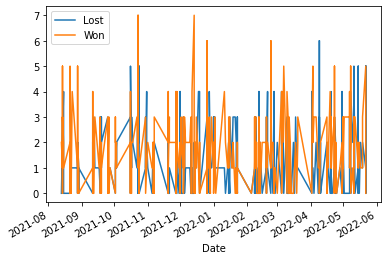

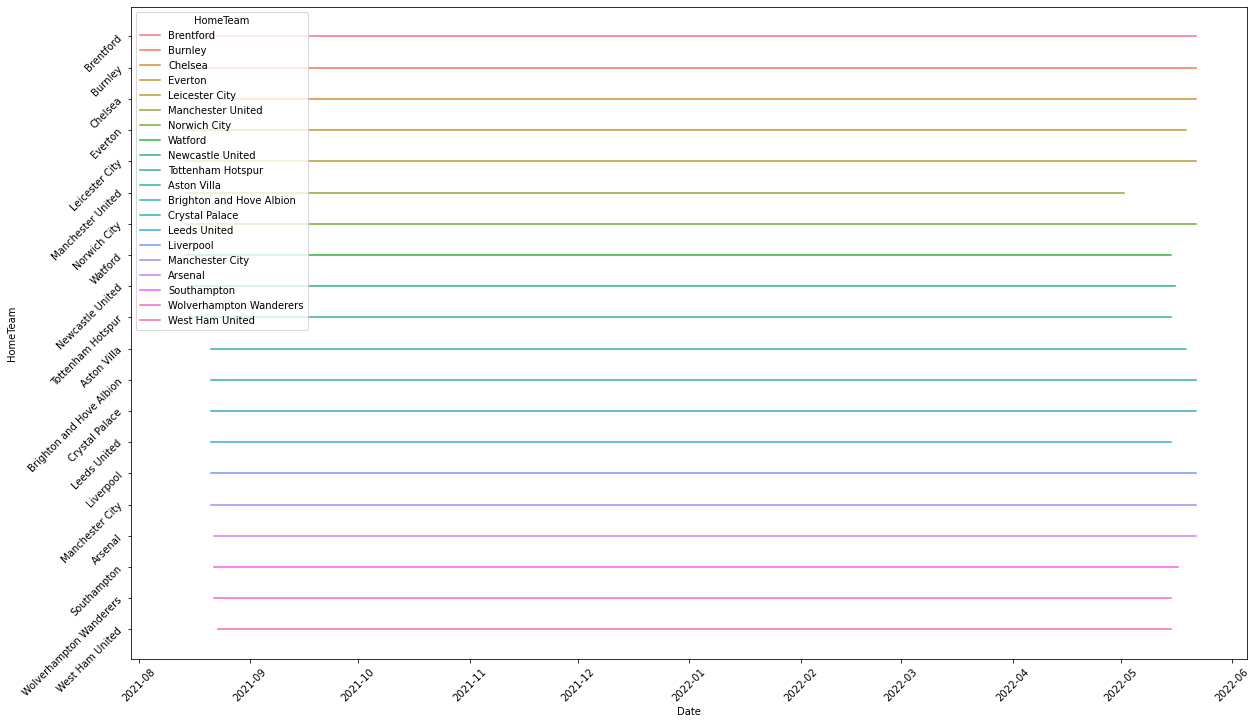

In [41]:
mr.plot(x='Date', y=['Lost','Won'])
plt.figure(figsize=(20,12))
ax = sns.lineplot(x='Date', y='HomeTeam', hue='HomeTeam', data=mr)
ax.tick_params(rotation=45)

plt.show()

In [42]:
mr.rename(columns={'HomeTeam':'Team'}, inplace=True)
mr.columns

Index(['Date', 'Team', 'Result', 'AwayTeam', 'Won', 'Lost'], dtype='object')

In [43]:
rs=(mr.groupby(['Team','AwayTeam']).agg(Won=('Won','max'),Lost=('Lost','max')).reset_index().round(2))
rs.head(20)


Team                  AwayTeam  Won  Lost
0       Arsenal               Aston Villa    3     1
1       Arsenal                 Brentford    2     1
2       Arsenal  Brighton and Hove Albion    1     2
3       Arsenal                   Burnley    0     0
4       Arsenal                   Chelsea    0     2
5       Arsenal            Crystal Palace    2     2
6       Arsenal                   Everton    5     1
7       Arsenal              Leeds United    2     1
8       Arsenal            Leicester City    2     0
9       Arsenal                 Liverpool    0     2
10      Arsenal           Manchester City    1     2
11      Arsenal         Manchester United    3     1
12      Arsenal          Newcastle United    2     0
13      Arsenal              Norwich City    1     0
14      Arsenal               Southampton    3     0
15      Arsenal         Tottenham Hotspur    3     1
16      Arsenal                   Watford    1     0
17      Arsenal           West Ham United    2     0
18      Arsenal   Wolverhampton Wanderers    2     1
19  Aston Villa                   Arsenal    0     1

In [44]:
fig = px.sunburst(rs,path=['Team','AwayTeam'], values='Won')
fig.update_layout(margin=dict(t=0, r=0, b=0))
fig.show()

# End